# 1.Buisness Problem

#### **What is Mercari ?**

> Mercari is a marketplace platform where you can buy and sell almost anything provided the item can be shipped. It is currently operating in Japan and the United States. It is similar to the Quickr or OLX in India.




#### **Problem Statement**

> Predicting the price of the product can be a tough challenge especially when the product is seasonal. The same product with different brands can range in the different price range making it difficult for the sellers to set a fair price to make profit and selling the product below the market price would be a loss.


#### **Business Objective**



>* Mercari wants us to come up with a model that can suggest the best market price of that product online such that there will be a fair price predicted for the product leading to better experience for the customer and seller<br>
>* Model should not take too long to predict the price.



#### **Data Overview**

> The files consist of a list of product which are seperated by tab.

    * train_id or test_id - the id of the listing

    * name - the title of the listing. Note that we have cleaned the data to remove text that look like prices (e.g. \$20) to avoid leakage. These removed prices are represented as [rm] 

    * item_condition_id - the condition of the items provided by the seller

    * category_name - category of the listing

    * brand_name - brand of the product. 

    * price - the price that the item was sold for. This is the target variable that you will predict. The unit is USD. 

    * shipping - 1 if shipping fee is paid by seller and 0 by buyer

    * item_description - the full description of the item. Note that we have cleaned the data to remove text that look like prices (e.g. \$20) to avoid leakage. These removed prices are represented as [rm]

#### **Type of Machine Learning problem**

> The price is a target variable which is a continuous variable, therefore it is a Regression problem.




#### **Performance Metric -**

> The error metric that we use for the regression problem is the RMSE (root mean square error). But in this case study we are going to use the RMSLE which is Root Mean Squared Logarithmic Error because of the following reasons -<br>
>    * Robust to outliers.
>    * It scale invariant which means changing the scale by a certain amount does not change the final result.
>    * Biased Penalty - penalises those error which are underestimated
rather than overestimated which may increase the profit for company and seller as well.

The RMSLE is calculated as -
<img src="https://miro.medium.com/max/875/0*AUzyQ1rc6mpQVYfn">

reference - https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

<br><br><br>

## Importing data

In [ ]:
# import modules
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import math
import nltk
from collections import Counter
import os
import shutil
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
# importing the data in colab using CurlWget

! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/train.tsv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1624637903&Signature=hSmyT%2FpjL%2FYWV1wFI0iaYGk%2BfNBAQfFkz7twkraTZCfQQOXeotxECoBDZ%2BStpB9lO6%2BdOoKOspyN%2By8PxTkg2artR154Rmeq7WN0lbcDYfpKLGyduIY0%2Bpfrw3WPyM%2F6OEtNkcQzweg7o0rx9hC4Nmh29yymgGrFYDZuoTa53E6PqVqiRaK471eGZa8tZaRXS9fdJ47%2FHdxTY%2FbCZGydmS1E%2FDz3%2BYFempY%2Fsa7O%2BjdzGUeAu4KusRwvpeuc2qZsxqIjW4NhHE5PovOpY2z4ckn48%2F6Z6zzd2Ke1QjCC471nzj%2BTqdp%2F9KAtQIKX9mTyJhjhM9b2Dsnxd%2F8yvqQy0w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.tsv.7z" -c -O 'train.tsv.7z'

--2021-06-25 04:26:07--  https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/train.tsv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1624637903&Signature=hSmyT%2FpjL%2FYWV1wFI0iaYGk%2BfNBAQfFkz7twkraTZCfQQOXeotxECoBDZ%2BStpB9lO6%2BdOoKOspyN%2By8PxTkg2artR154Rmeq7WN0lbcDYfpKLGyduIY0%2Bpfrw3WPyM%2F6OEtNkcQzweg7o0rx9hC4Nmh29yymgGrFYDZuoTa53E6PqVqiRaK471eGZa8tZaRXS9fdJ47%2FHdxTY%2FbCZGydmS1E%2FDz3%2BYFempY%2Fsa7O%2BjdzGUeAu4KusRwvpeuc2qZsxqIjW4NhHE5PovOpY2z4ckn48%2F6Z6zzd2Ke1QjCC471nzj%2BTqdp%2F9KAtQIKX9mTyJhjhM9b2Dsnxd%2F8yvqQy0w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.tsv.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.250.65.80, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77912192 (74M) [application/x-7z-compressed]
Saving to: ‘train.tsv.7z’

train.tsv.7z   

In [ ]:
# reference - https://stackoverflow.com/questions/49955814/unzip-a-7z-file-in-google-collab

!7z e train.tsv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: train.tsv.7z
--
Path = train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3% - train.tsv                  7% - train.tsv                 11% - train.tsv                 14% - train.tsv                 17% - train.tsv                 21% - train.tsv                 24% - train.tsv                 28% - train.tsv                 32% - train.tsv

<br><br>

# Exploratory Data Analysis (EDA)

In [ ]:
# importing the data
# here the file is tab-seperated, therefore using '\t'
data = pd.read_csv('train.tsv', sep='\t')

In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
print(data.shape)

(1482535, 8)


###### Observation - 
The data contains near about 1.5 million rows and 8 columns
<br>

In [ ]:
data.describe(include='all')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
count,1.482535e+06,1482535,1.482535e+06,1476208,849853,1.482535e+06,1.482535e+06,1482531
unique,NaN,1225273,NaN,1287,4809,NaN,NaN,1281426
top,NaN,Bundle,NaN,"Women/Athletic Apparel/Pants, Tights, Leggings",PINK,NaN,NaN,No description yet
freq,NaN,2232,NaN,60177,54088,NaN,NaN,82489
mean,7.412670e+05,NaN,1.907380e+00,NaN,NaN,2.673752e+01,4.472744e-01,NaN
std,4.279711e+05,NaN,9.031586e-01,NaN,NaN,3.858607e+01,4.972124e-01,NaN
min,0.000000e+00,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,3.706335e+05,NaN,1.000000e+00,NaN,NaN,1.000000e+01,0.000000e+00,NaN
50%,7.412670e+05,NaN,2.000000e+00,NaN,NaN,1.700000e+01,0.000000e+00,NaN
75%,1.111900e+06,NaN,3.000000e+00,NaN,NaN,2.900000e+01,1.000000e+00,NaN


Observation -<br>
* Name feature seems to have most of the product name as unique.
* In the category column there seems to be a lot of product sold related to Women.
* The brand with the PINK seems to be more frequent then other brands.
* "No description yet" seems to the most frequent product description in item_description which doesn't provide any information about product.



In [ ]:
data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

Observation - <br>
category_name, brand_name, item_description contains the Nan values.<br>
brand_name contains the largest Nans - 632682   followed by category_name - 6327   followed by item_description - 4

In [ ]:
data.isnull().sum() / data.shape[0]

train_id             0.000000
name                 0.000000
item_condition_id    0.000000
category_name        0.004268
brand_name           0.426757
price                0.000000
shipping             0.000000
item_description     0.000003
dtype: float64

Observation - 
* 0.4 percent of the category_name are nans
* 42.67 percent of the brand_name are nans.
* percent of item_description empty are very less but there are products with item description as 'No description yet' which needs to be handle.


In [ ]:
data.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...


<br><br>

### EDA on Price 

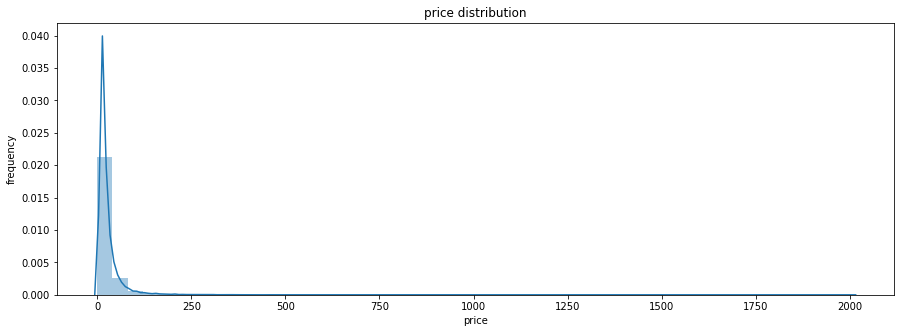

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(data.price, bins=50)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('price distribution')
plt.show()

Observation - 

    * The above plot is a skewed distribution which is highly skewed towards right.
    * It can be observed that there are a large number of products sold with price in between 0-250 USD .
    * There are few number of products sold with higher price range.



In [ ]:
# sorting the prices in ascending order
sorted_values = sorted(data.price)

In [ ]:
# getting the percentiles between 0-100
for i in range(0,101,10):
    print('{} percentile value is: {}'.format(i,np.percentile(sorted_values, i)))

0 percentile value is: 0.0
10 percentile value is: 7.0
20 percentile value is: 10.0
30 percentile value is: 12.0
40 percentile value is: 14.0
50 percentile value is: 17.0
60 percentile value is: 20.0
70 percentile value is: 26.0
80 percentile value is: 34.0
90 percentile value is: 51.0
100 percentile value is: 2009.0


Observation:<br>
* It can be observed that there are some products with price 0
* The highest price of the product is 2009.0

In [ ]:
# getting percentile between 90-100
for i in range(90,101,1):
    print('{} percentile value is: {}'.format(i,np.percentile(sorted_values, i)))

90 percentile value is: 51.0
91 percentile value is: 55.0
92 percentile value is: 58.0
93 percentile value is: 62.0
94 percentile value is: 67.0
95 percentile value is: 75.0
96 percentile value is: 85.0
97 percentile value is: 99.0
98 percentile value is: 122.0
99 percentile value is: 170.0
100 percentile value is: 2009.0


Observation -<br>
* 99 percent of the prices are below and equal to 170
* 1 percent of the prices are above 170.



In [ ]:
for i in range(0,11,1):
    print('{} percentile value is: {}'.format((99 + i * 0.1),np.round(np.percentile(sorted_values, (99 + (i * 0.1))),1)))

99.0 percentile value is: 170.0
99.1 percentile value is: 180.0
99.2 percentile value is: 189.0
99.3 percentile value is: 200.0
99.4 percentile value is: 210.0
99.5 percentile value is: 230.3
99.6 percentile value is: 256.0
99.7 percentile value is: 286.0
99.8 percentile value is: 340.0
99.9 percentile value is: 450.0
100.0 percentile value is: 2009.0


Observation - <br>
* There are few products (0.1 %) whose price range is above 450 USD.




<br><br>

### EDA on Item_condition 

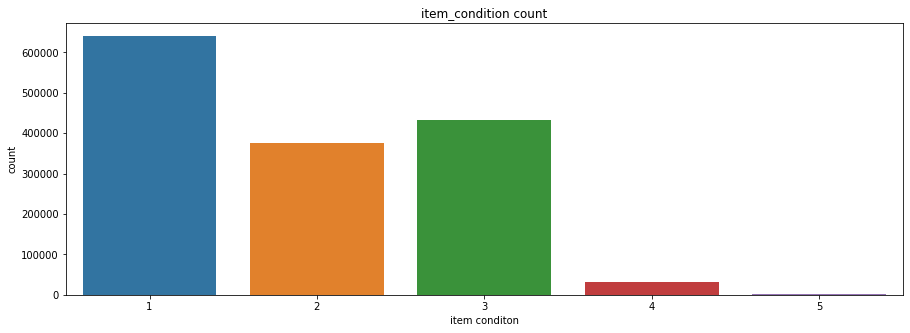

In [ ]:
ax,fig = plt.subplots(figsize=(15,5))
sns.countplot(x=data.item_condition_id, data=data, orient='v')
plt.xlabel('item conditon')
plt.title('item_condition count')
plt.show()

Observation-<br>
* very few products are sold with bad condition on scale 4 and 5
* near about 400000 products are sold with condition value 3
* most of the products are sold with condition 1 and 2 which are in  very good state.

> From the above plot the keytake away is the products which are in good shape are sold in a large number.



<br>

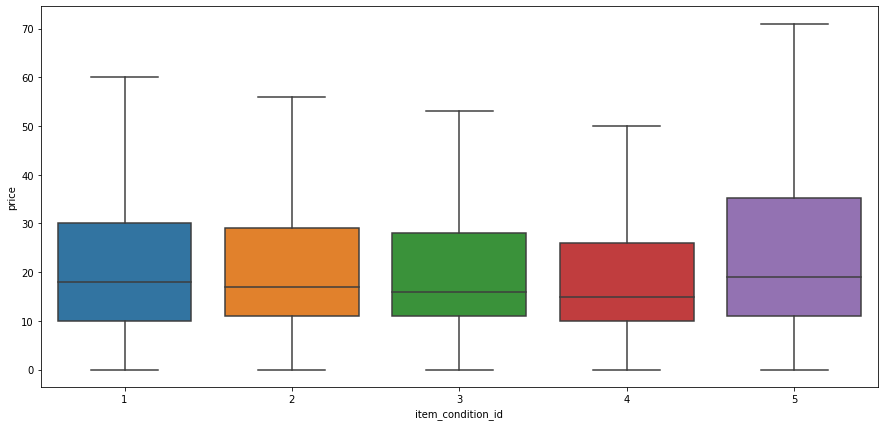

In [ ]:
# applying box plot to see how the prices vary for different item condition
ax,fig = plt.subplots(figsize=(15,7))
sns.boxplot(x='item_condition_id', y='price', data=data, showfliers = False)  # show fliers used to remove the outliers
plt.show()

Observation -<br>


* the price of item_condition = 5 seems to be larger than the other item_conditions .
* there is not much difference seen in the prices for item_condition - 1,2,3 and 4.
* The price of the products with item_condition - 5 is higher, which is weird because the products with the item_condition - 5 are not in good condition compared to item_condition 1,2,3,4.



In [ ]:
condition_id_price_median = data.groupby('item_condition_id').median('price')['price'].to_dict()
condition_id_price_median

{1: 18.0, 2: 17.0, 3: 16.0, 4: 15.0, 5: 19.0}

In [ ]:
data['prod_greater_than_median_price_condition'] = data[['price','item_condition_id']].apply(lambda x: 1 if x[0] > condition_id_price_median[x[1]] else 0, axis=1).values

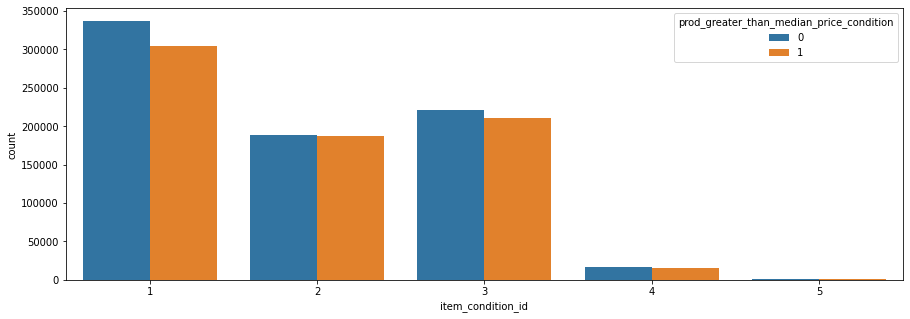

In [ ]:
ax,fig = plt.subplots(figsize=(15,5))
ax = sns.countplot(x="item_condition_id", hue="prod_greater_than_median_price_condition", data=data)
plt.show()

<br><br>

### EDA on Shipping

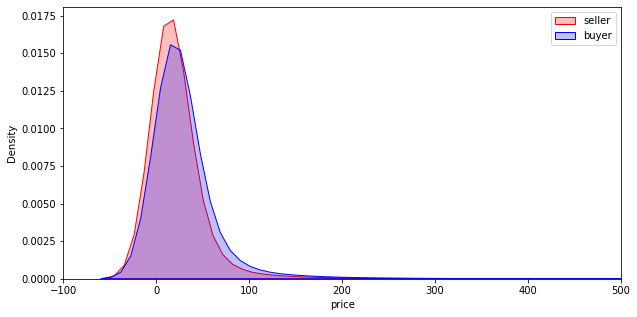

In [ ]:
shipping_seller = data[data.shipping == 1].price
shipping_buyer  = data[data.shipping == 0].price
plt.figure(figsize=(10,5))
sns.distplot(shipping_seller, hist=False,color='red', label = 'seller', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(shipping_buyer, hist=False, color='blue', label='buyer', kde_kws={'bw':0.5, 'shade':True})
plt.xlim(-100, 500)
plt.legend()
plt.show()

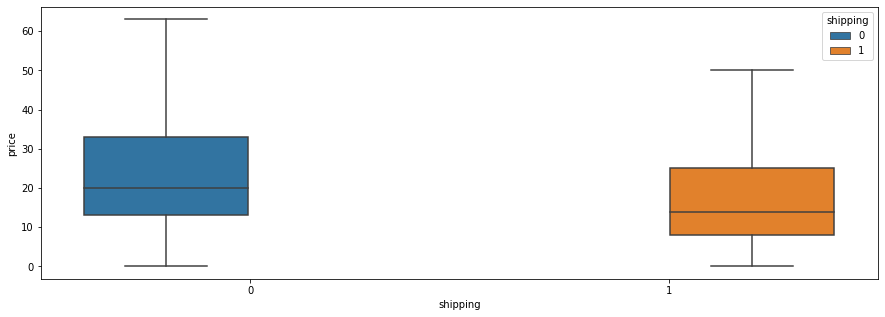

In [ ]:
# applying box plot to see how the prices vary for shipping feature
ax,fig = plt.subplots(figsize=(15,5))
sns.boxplot(x='shipping', y='price', hue='shipping', data=data, showfliers = False) # show fliers used to remove outliers

plt.show()

Observation -
* The buyer seems to have the higher price for the product than the seller.

<br><br>

### EDA on Brand

In [ ]:
brand_names_count = Counter(data.brand_name)
brand_common = dict(brand_names_count.most_common()[:10])

In [ ]:
keys = list(brand_common.keys())
values = [float(brand_common[k]) for k in keys]

<br>

### top 10 brands


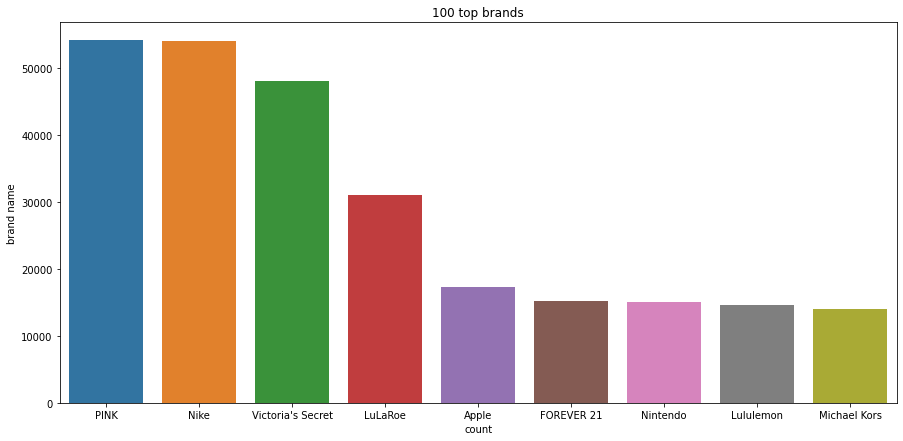

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
g = sns.barplot(x=keys, y=values, data=data, orient='v')
plt.ylabel('brand name')
plt.xlabel('count')
plt.title('100 top brands')
plt.show()

In [ ]:
# creating the copy of data 
data_new = data.copy(deep=True)

In [ ]:
#  filtering data according to most common brand
data_new.index = data_new.brand_name.apply(lambda x: True if x in brand_common else False)
data_new.index.name = 'bool'

In [ ]:
# getting the mean of price of brands which are most common
tt = data_new.loc[True].groupby('brand_name').mean('price')
# sorting the brands by price
tt.sort_values('price',ascending=False, ignore_index=False,inplace=True)

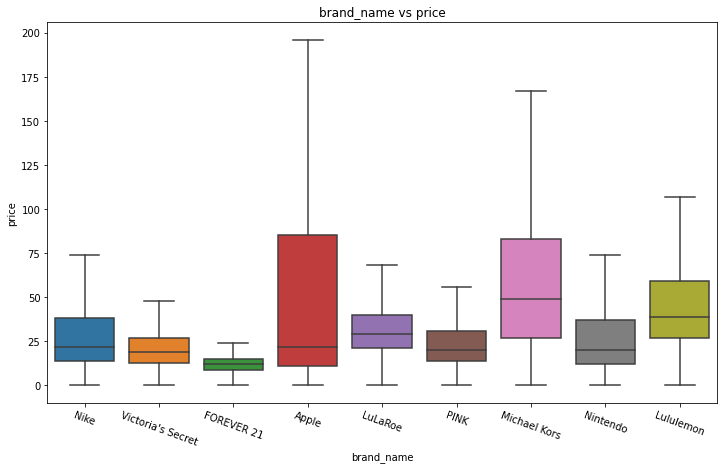

In [ ]:
# plotting the box plot for brand_name feature
ax, fig = plt.subplots(figsize=(12,7))
sns.boxplot(y='price', x='brand_name', data=data_new.loc[True], showfliers = False) #showfliers used to remove outliers
plt.title('brand_name vs price')
plt.xticks(rotation=-20)
plt.show()

Observation - <br>

*   The brand feature is helpful as the prices vary a lot for different features which will be helpful in predicting the prices.



<br>

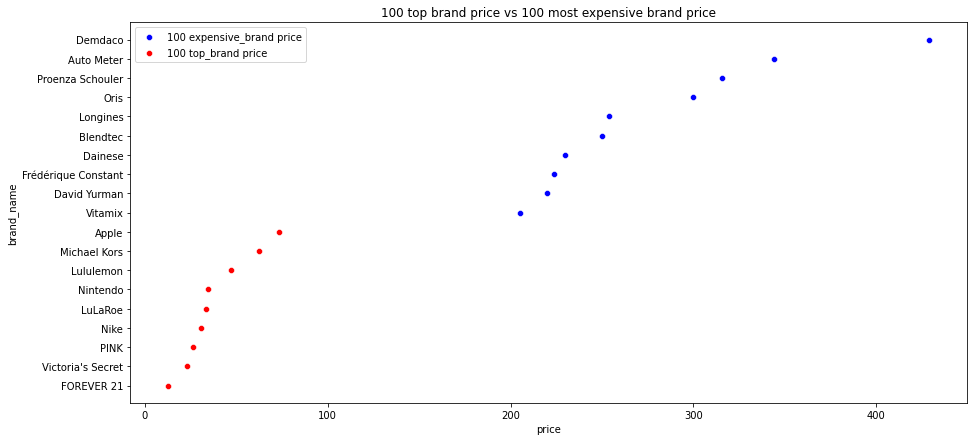

In [ ]:
# plotting scatter plot for 100 expensive plot vs 100 most common product price
ax, fig = plt.subplots(figsize=(15,7))
xx = data.groupby('brand_name').median('price')
xx.sort_values('price',ascending=False, ignore_index=False,inplace=True)
sns.scatterplot(data=xx[:10], x="price", y="brand_name", color='blue',label='100 expensive_brand price')
sns.scatterplot(data=tt, x="price", y="brand_name",color='red', label='100 top_brand price')
plt.title('100 top brand price vs 100 most expensive brand price')
plt.show()

Observation - 
> The mean price of top 10 brands by there counts does not fall in the mean price of top expensive product.It means most of the product sold are in the mid range between 1-100.






<br><br>

### EDA on Item_description

In [ ]:
data.item_description.describe()

count                1482531
unique               1281426
top       No description yet
freq                   82489
Name: item_description, dtype: object

Observation-


*   The most common value is "No description yet" which does not provide any information and should be replaced by 'unk_desc'.


<br>

In [ ]:
data.item_description.fillna('', inplace=True)

In [ ]:
data['item_description'] = data.item_description.replace(['No description yet'],'')

In [ ]:
def len_string(string):
    ''' 
        Function to compute length of string based on split return the count of the number of words

        input: string
        returns: integer  
    '''
    try:
        return len(string.split(' '))
    except:
        return 0

In [ ]:
data['item_description_len'] = data.item_description.apply(len_string)

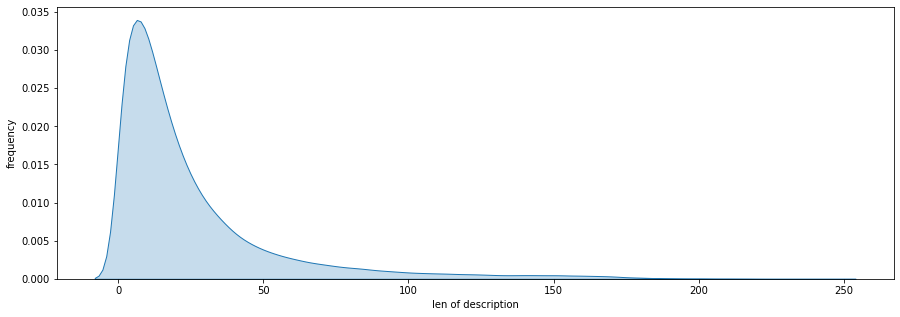

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(data.item_description_len, bw=0.1, shade=True)
plt.xlabel('len of description')
plt.ylabel('frequency')
plt.show()

Observation - <br>


* There are more products with the word count within range of 1 to 50 for the product item_description.



<br>

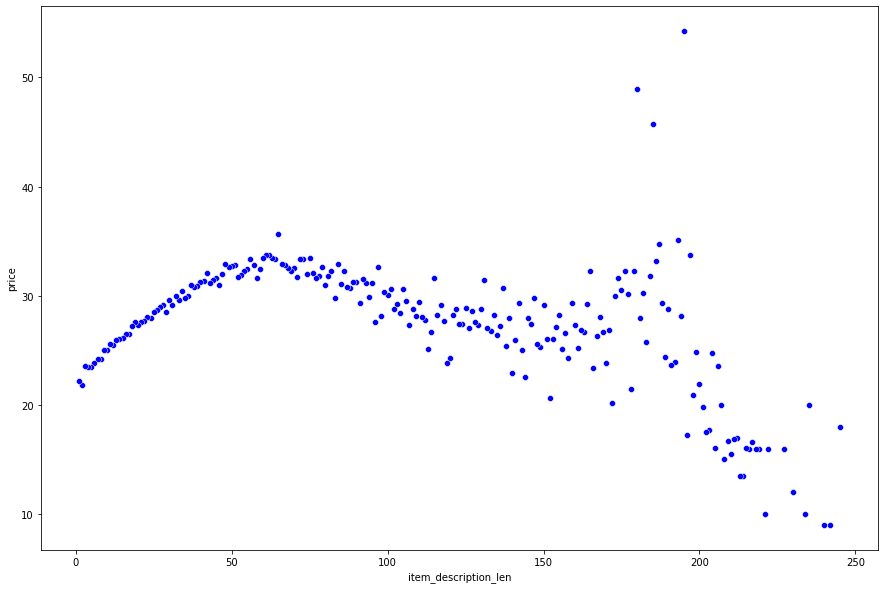

In [ ]:
ax, fig = plt.subplots(figsize=(15,10))
groupby_item_desc = data.groupby('item_description_len').mean('price')
groupby_item_desc.sort_values('item_description_len', ascending=False,inplace=True)
sns.scatterplot(data=groupby_item_desc, x="item_description_len", y="price", color='blue')
plt.show()

Observation - <br>
From above plot it can be observed that as the word length of item_description increases the price tends to increase only in the range 0-70 then there seems no correlation between them.


<br>

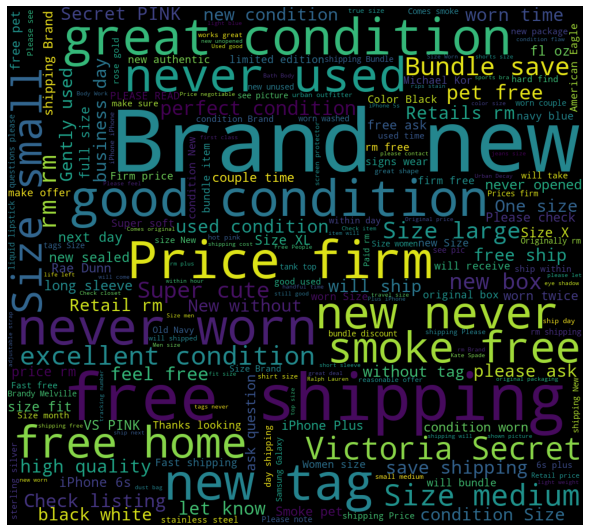

In [ ]:
# reference - https://www.geeksforgeeks.org/generating-word-cloud-python/

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 900,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(i for i in data.item_description.astype(str).tolist() if i != 'rm'  ))
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Observation - <br>
It can be seen that the word like 'good condition', 'never used', 'great condition', 'free shipping', 'new never', etc.. may contribute in predicting the price. The seller seems to advertise the brand_names to sell the products.

<br><br>


### EDA on Name

In [ ]:
data['name_len'] = data.name.apply(len_string)

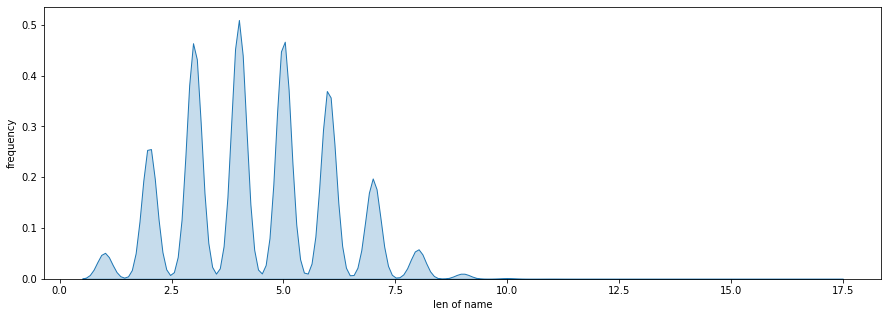

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(data.name_len, bw=0.1, shade=True)
plt.xlabel('len of name')
plt.ylabel('frequency')
plt.show()

Observation - <br>


* There are more products with the word count within range of 2 - 7 for the name feature.



<br>

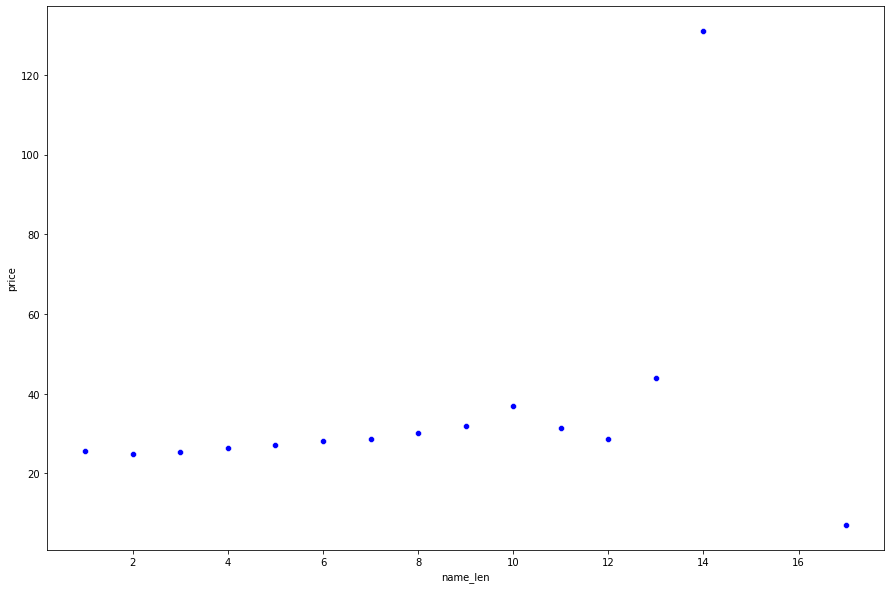

In [ ]:
ax, fig = plt.subplots(figsize=(15,10))
groupby_name_desc = data.groupby('name_len').mean('price')
# groupby_item_desc.sort_values('name_len', ascending=False,inplace=True)
sns.scatterplot(data=groupby_name_desc, x="name_len", y="price", color='blue')
plt.show()

Observation - <br>
there doen't seem to be any correlation between the word length of name feature where for every word length of string the price seems to be near about same except for word length above 11.


<br>

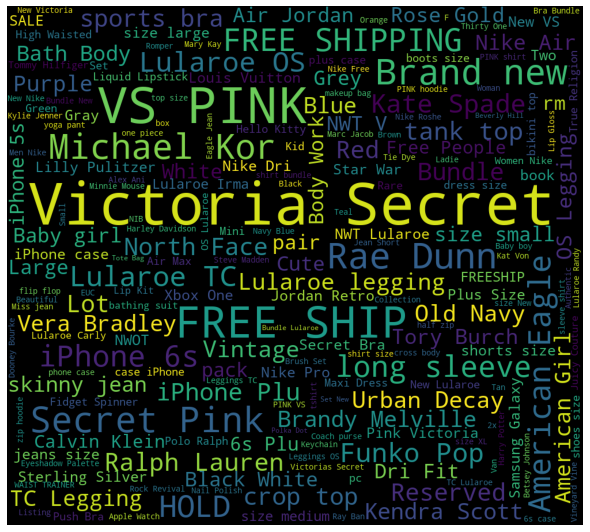

In [ ]:
# reference - https://www.geeksforgeeks.org/generating-word-cloud-python/

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 900,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(i for i in data.name.astype(str).tolist() ))
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Observation - <br>
It seems that in name feature the seller writes the short description about the product (its model or brand) providing some information and seem to advertise the shipping details as well.

<br><br>

### EDA on Categorical

In [ ]:
data.category_name.unique().shape

(1288,)

Observation - 
There are 1288 unique categories with there subcategory as well.

In [ ]:
category_names = Counter(data.category_name)
category_common = dict(category_names.most_common()[:10])

In [ ]:
keys = list(category_common.keys())
values = [float(category_names[k]) for k in keys]

<br>

### top 10 category names


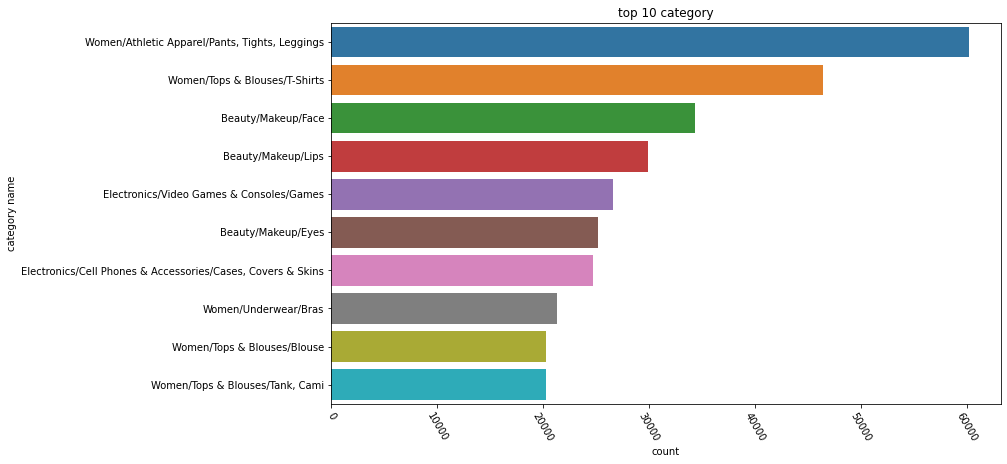

In [ ]:
ax, fig = plt.subplots(figsize=(12,7))
g = sns.barplot(y=keys, x=values, data=data, orient='h')
plt.ylabel('category name')
plt.xlabel('count')
plt.title('top 10 category')
plt.xticks(rotation=-60)
plt.show()

In [ ]:
data_100_category = data.copy()

In [ ]:
data_100_category.index = data_100_category.category_name.apply(lambda x: True if x in category_common else False)
data_100_category.index.name = 'bool'

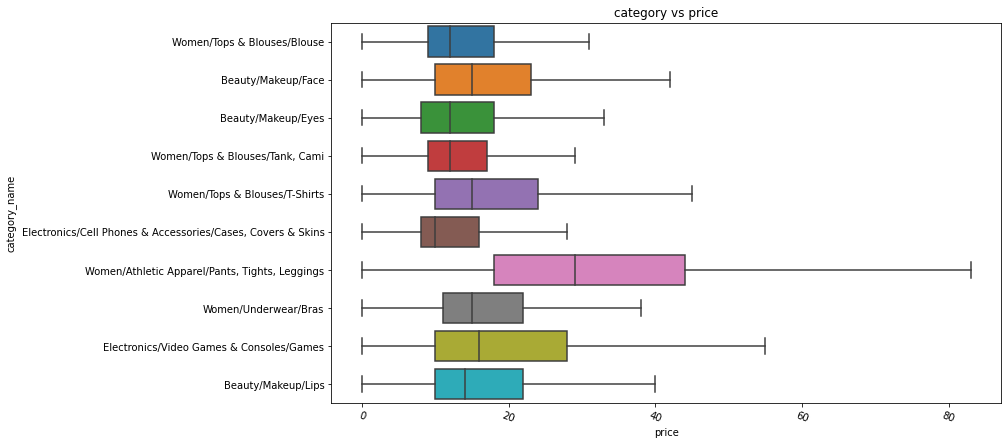

In [ ]:
ax, fig = plt.subplots(figsize=(12,7))
sns.boxplot(x='price', y='category_name', data=data_100_category.loc[True], showfliers=False)
plt.title('category vs price')
plt.xticks(rotation=-20)
plt.show()

Observation - <br>

*   The category is also helpful as the prices differ a lot for different features which will be helpful in predicting the prices.



<br>

In [ ]:
def category_split(string_):
    '''
        Function for splitting the categorical feature in to three subcategorical feature.
        
        input: string
        returns: three strings which are categories 
            else    
                 returns 'no label' for three feature
    '''
    try:
        split_string =  string_.split('/')
        main_cat, sub_cat1, sub_cat2 = split_string[0], split_string[1], split_string[2]
        return main_cat, sub_cat1, sub_cat2
    except:
        return 'no label', 'no label', 'no label'

In [ ]:
data['main_category'], data['sub_category1'], data['sub_category2'] = zip(*data.category_name.apply(lambda x: category_split(x)))

In [ ]:
main_category_names = Counter(data.main_category)
main_category_common = dict(main_category_names.most_common())

In [ ]:
keys = list(main_category_common.keys())
values = [float(main_category_names[k]) for k in keys]

<br>

### main category names


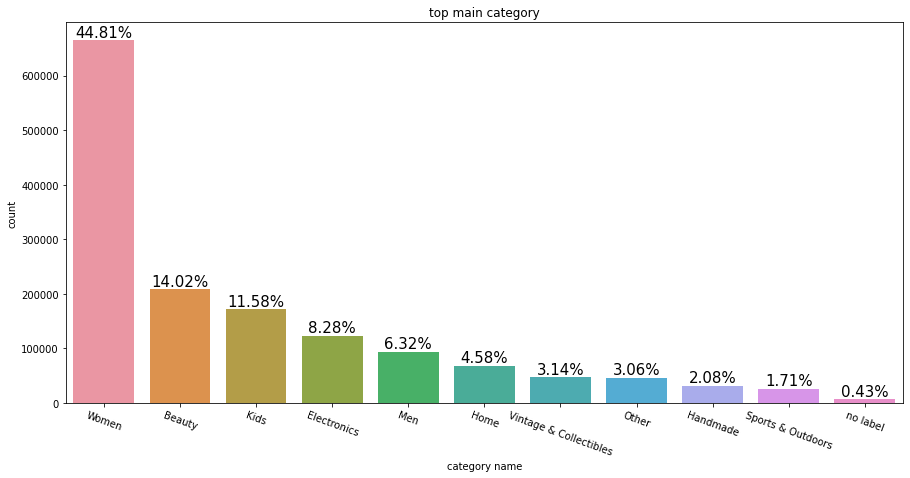

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
g = sns.barplot(y=values, x=keys, data=data, orient='v')

# iterative loop is for annotation
# reference: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for bar in g.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(((bar.get_height() / data.shape[0])* 100) , '.2f') + '%', \
                    (bar.get_x() + bar.get_width() / 2, \
                    bar.get_height()), ha='center', va='center',\
                   size=15, xytext=(0, 8), \
                   textcoords='offset points')
    

plt.ylabel('count')
plt.xlabel('category name')
plt.title('top main category')
plt.xticks(rotation=-20) # Set the x-axis label rotation angle
plt.show()

Observation -<br>
* The woman (44.81%) main category seems to dominate in the product sales followed by beauty(14.02%), kids(11.58%), electronics(8.28%) , men(6.32%), etc..



<br>

In [ ]:
main_category_groupby = data.groupby('main_category').median('price').sort_values('price',ascending=False)

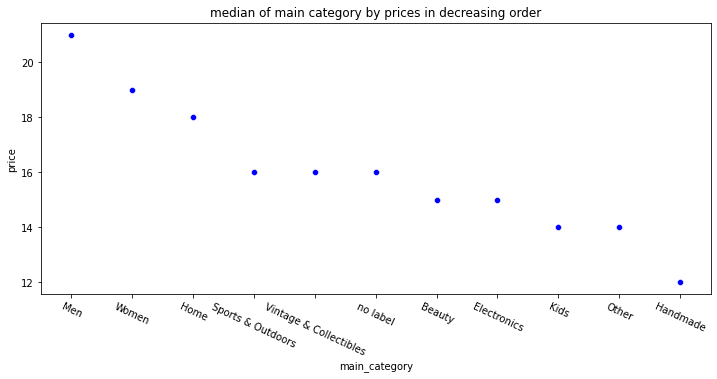

In [ ]:
ax, fig = plt.subplots(figsize=(12,5))
sns.scatterplot(data=main_category_groupby, x="main_category", y="price", color='blue')
plt.xticks(rotation=-25) # Set the x-axis label rotation angle
plt.title('median of main category by prices in decreasing order')
plt.show()

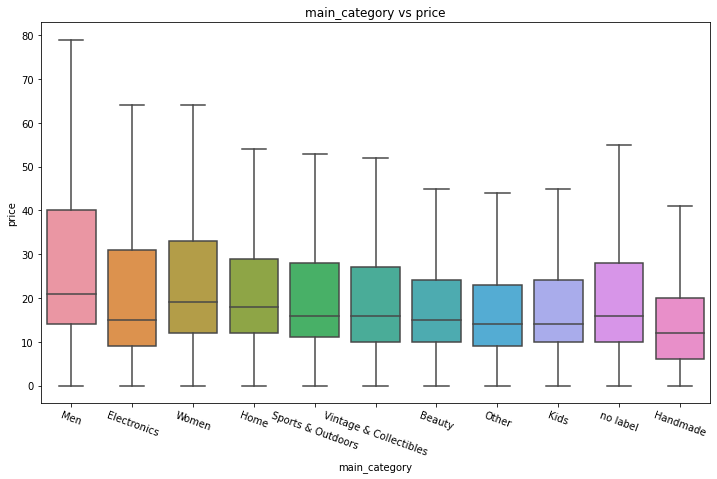

In [ ]:
ax, fig = plt.subplots(figsize=(12,7))
sns.boxplot(x='main_category', y='price', data=data, showfliers=False)
plt.title('main_category vs price')
plt.xticks(rotation=-20)
plt.show()

Observation - <br>
* Even though the Women category seems to dominate the number of products sold but when it comes to price, the Men category seems to dominate.
* There seems to be very less difference between the prices of main_category feature which won't be helpful in deterining the prices alone.



<br>

### top 10 subcategory1 names

In [ ]:
subcategory1_names = Counter(data.sub_category1)
subcategory_common = dict(subcategory1_names.most_common()[:10])

In [ ]:
keys = list(subcategory_common.keys())
values = [float(subcategory_common[k]) for k in keys]

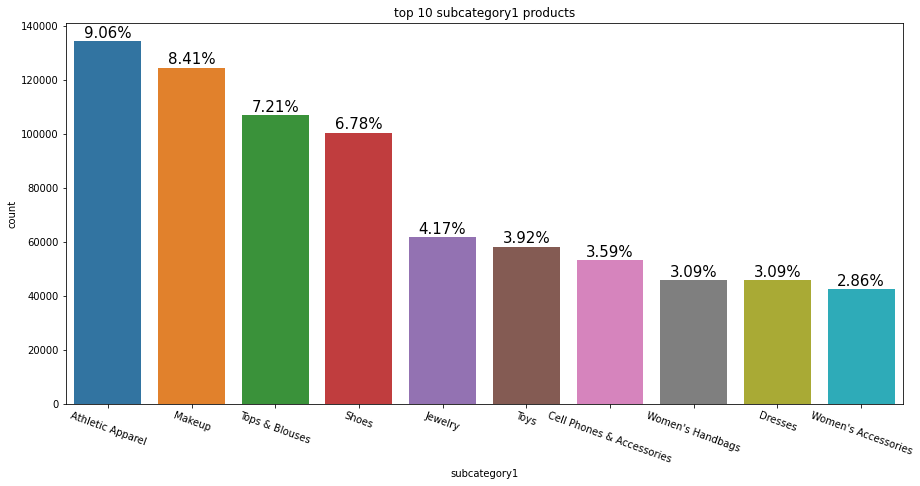

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
g = sns.barplot(x=keys, y=values, data=data, orient='v')

# iterative loop is for annotation
# reference: https://stackoverflow.com/questions/42861049/horizontal-barplot-with-annotations/42865017
for bar in g.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    
    g.annotate(format(((bar.get_height() / data.shape[0])* 100) , '.2f') + '%', \
                    (bar.get_x() + bar.get_width() / 2, \
                    bar.get_height()), ha='center', va='center',\
                   size=15, xytext=(0, 8), \
                   textcoords='offset points')
    

plt.ylabel('count')
plt.xlabel('subcategory1')
plt.title('top 10 subcategory1 products')
plt.xticks(rotation=-20) # Set the x-axis label rotation angle
plt.show()

In [ ]:
sub_category1_groupby = data.groupby('sub_category1').median('price').sort_values('price',ascending=False)

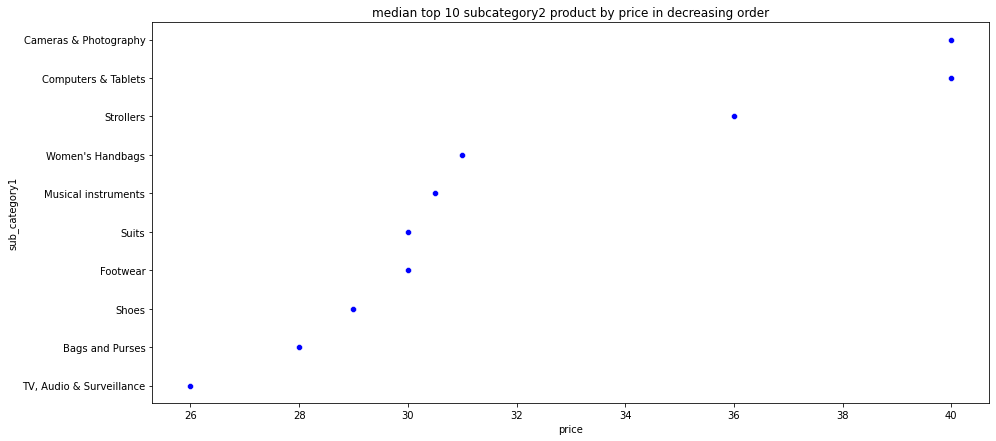

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
sns.scatterplot(data=sub_category1_groupby[:10], x="price", y="sub_category1", color='blue')
plt.title('median top 10 subcategory2 product by price in decreasing order')
plt.show()

In [ ]:
data_100_subcategory = data.copy()

In [ ]:
data_100_subcategory.index = data_100_subcategory.sub_category1.apply(lambda x: True if x in subcategory_common else False)
data_100_subcategory.index.name = 'bool'

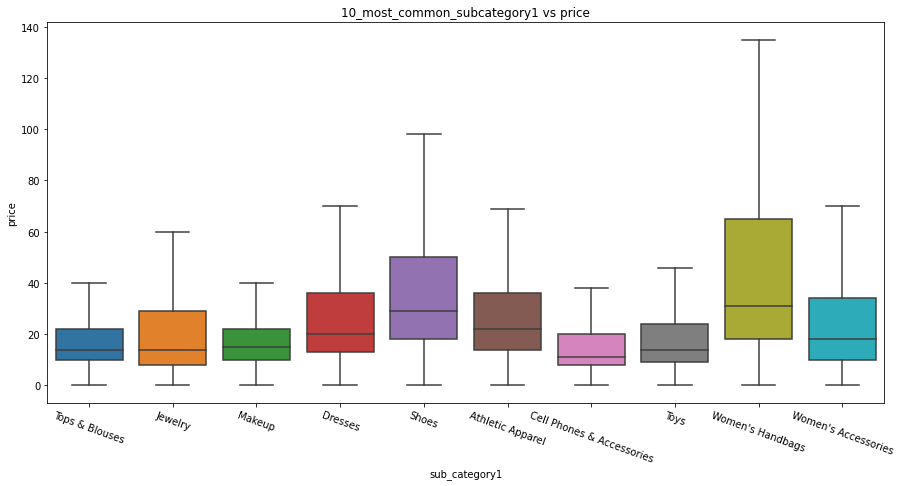

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
sns.boxplot(y='price', x='sub_category1', data=data_100_subcategory.loc[True], showfliers=False)
plt.title('10_most_common_subcategory1 vs price')
plt.xticks(rotation=-20) 
plt.show()

Observation - <br>
* There is a variability in the prices of the subcategory1 feature which will be good in predicting prices


<br>

### top 10 subcategory2 names

In [ ]:
subcategory2_names = Counter(data.sub_category2)
subcategory_common = dict(subcategory2_names.most_common()[:10])

In [ ]:
keys = list(subcategory_common.keys())
values = [float(subcategory_common[k]) for k in keys]

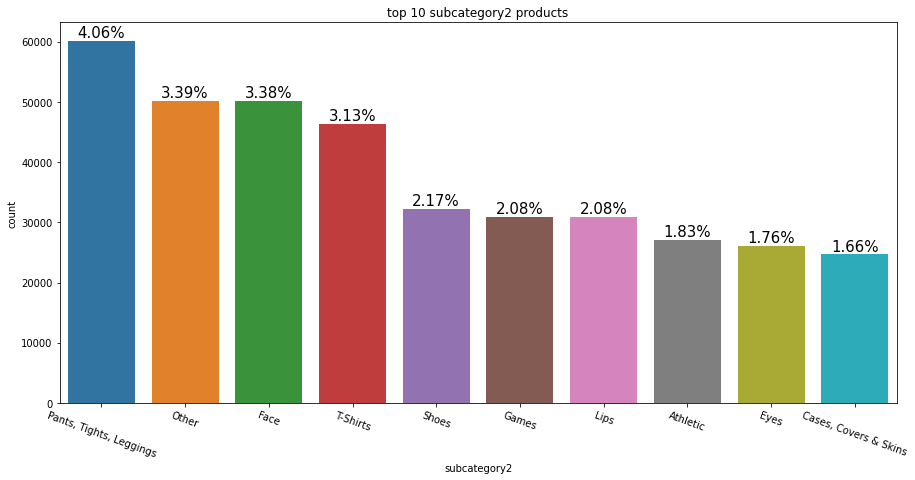

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
g = sns.barplot(x=keys, y=values, data=data, orient='v')

# iterative loop is for annotation
# reference: https://stackoverflow.com/questions/42861049/horizontal-barplot-with-annotations/42865017
for bar in g.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(((bar.get_height() / data.shape[0])* 100) , '.2f') + '%', \
                    (bar.get_x() + bar.get_width() / 2, \
                    bar.get_height()), ha='center', va='center',\
                   size=15, xytext=(0, 8), \
                   textcoords='offset points')
    

plt.ylabel('count')
plt.xlabel('subcategory2')
plt.title('top 10 subcategory2 products')
plt.xticks(rotation=-20) # Set the x-axis label rotation angle
plt.show()

In [ ]:
sub_category2_groupby = data.groupby('sub_category2').median('price').sort_values('price',ascending=False)

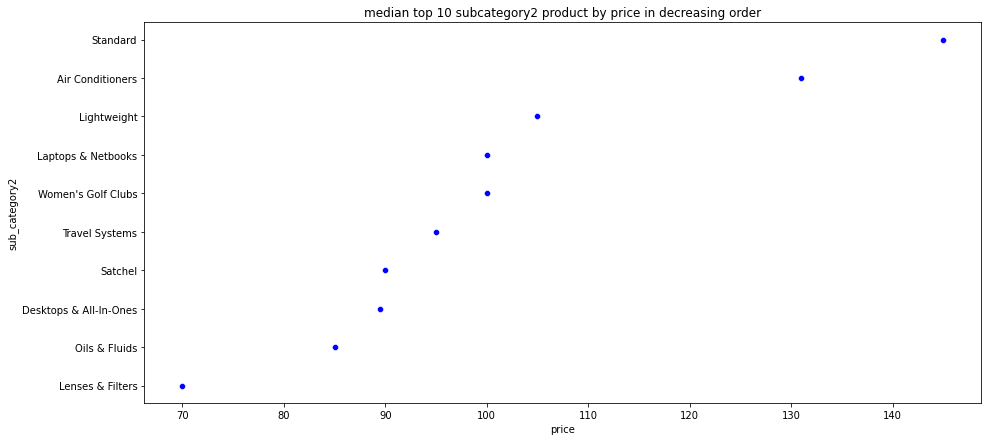

In [ ]:
ax, fig = plt.subplots(figsize=(15,7))
sns.scatterplot(data=sub_category2_groupby[:10], x="price", y="sub_category2", color='blue')
plt.title('median top 10 subcategory2 product by price in decreasing order')
plt.show()

In [ ]:
data_100_subcategory = data.copy()

In [ ]:
data_100_subcategory.index = data_100_subcategory.sub_category2.apply(lambda x: True if x in subcategory_common else False)
data_100_subcategory.index.name = 'bool'

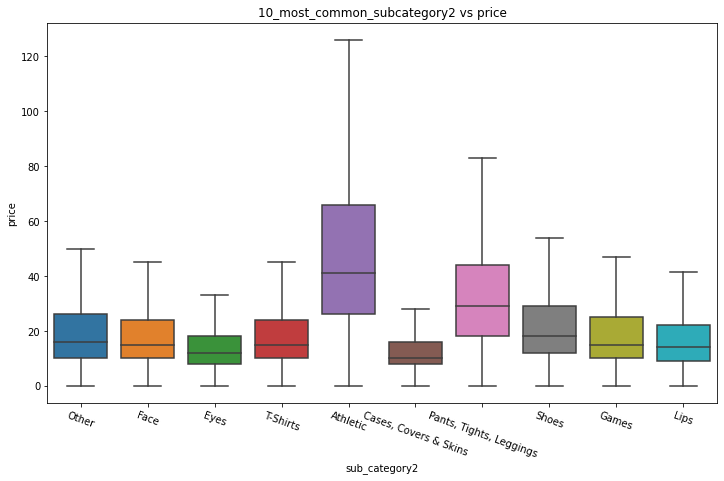

In [ ]:
ax, fig = plt.subplots(figsize=(12,7))
sns.boxplot(y='price', x='sub_category2', data=data_100_subcategory.loc[True], showfliers=False)
plt.title('10_most_common_subcategory2 vs price')
plt.xticks(rotation=-20)
plt.show()

Observation - <br>
* Like subcategory1, there is the variablity in prices of different products of subcategory2 which is also good for predicting prices.



<br><br>

## My Observation and key takeaway -

 
1) There are nearabout 1.5 million rows and 8 feature in Mercari_Price_Suggestion_Challenge.

2) The columns present in train dataset are - train_id, name, item_condition_id, category_name, brand_name, price, shipping, item_description.

3) The price column is the target variable.

4) The category_name, brand_name, item_description contains the nan values having percentage as 0.42, 42.67 and 0.0003 respectively.

5) Price is a skewed distribution which is skewed towards right.
    
6) Since the distribution is skewed towards right we can apply log transformation on price to make it Gaussian distributed.

7) Some of the products are present with 0 price.

8) There is not much difference seen in the price distribution of  different item_conditon feature.

9) For shipping feature comparing it with price, the buyers tend to pay more in comparision to sellers which may be because of the delievery charges included.

10) The category feature shows the variation in prices which may be helpful in the prediction.

   11) When we split the category feature and get the three sub-cateogries as main_category, subcategory1, subcategory2 then -<br>
> 
        - there is no variation in prices for main_category feature.<br>
        - the variabtion in prices can be seen for the subcategory1 and subcategory2 feature.

-> When doing feature engineering it would be better to consider all the three category as well, as the main category alone can not be important in predicting the price.
    
12) For the item_description and name feature, by obeserving the WordCloud of respective feature it can be observed that there are some words which can be have some affect on predicting the prices. So we can include Sentiment score as well


